In [55]:
import mysql.connector
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler 
import warnings

In [2]:
conn=mysql.connector.connect(host='localhost',username='root',password='Samantha8121',database='solordata')

my_cursor = conn.cursor()

In [3]:
sql_query = "SELECT * FROM solordata.solar"

data = pd.read_sql(sql_query,conn)

E:\anaconda\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
data.head()


,MyUnknownColumn,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,1,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
2,2,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L
3,3,0.060022,1.481506,101.135254,143.554688,-0.161988,0.436401,-0.328130,42.045898,-150.005493,109.052531,0.433003,48.973697,154.594808,49.907164,F0L
4,4,0.080020,1.497589,101.098633,143.554688,-0.155274,0.429688,-0.341558,41.792755,-149.716187,109.016368,0.445855,49.328317,154.592104,50.092065,F0L


In [8]:
data=data.drop(data.columns[0],axis=1)

In [ ]:
#drop time coloum

In [10]:
data=data.drop(data.columns[0],axis=1)

In [11]:
data.head()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
2,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L
3,1.481506,101.135254,143.554688,-0.161988,0.436401,-0.328130,42.045898,-150.005493,109.052531,0.433003,48.973697,154.594808,49.907164,F0L
4,1.497589,101.098633,143.554688,-0.155274,0.429688,-0.341558,41.792755,-149.716187,109.016368,0.445855,49.328317,154.592104,50.092065,F0L


In [15]:
s=sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [17]:
s.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
#eda

In [19]:
data.dtypes

Ipv      float64
Vpv      float64
Vdc      float64
ia       float64
ib       float64
ic       float64
va       float64
vb       float64
vc       float64
Iabc     float64
If       float64
Vabc     float64
Vf       float64
label     object
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ipv     10819 non-null  float64
 1   Vpv     10819 non-null  float64
 2   Vdc     10819 non-null  float64
 3   ia      10819 non-null  float64
 4   ib      10819 non-null  float64
 5   ic      10819 non-null  float64
 6   va      10819 non-null  float64
 7   vb      10819 non-null  float64
 8   vc      10819 non-null  float64
 9   Iabc    10819 non-null  float64
 10  If      10819 non-null  float64
 11  Vabc    10819 non-null  float64
 12  Vf      10819 non-null  float64
 13  label   10819 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.2+ MB


In [21]:
data.describe()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf
count,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000
mean,1.778036,88.107469,139.314020,0.262749,-0.025922,-0.256557,-82.525416,24.748361,60.444209,0.565051,49.646060,155.060724,49.999654
std,0.604265,23.239954,27.330037,0.357290,0.626772,0.573093,90.022337,113.112944,65.604643,0.557968,3.721104,6.417872,0.020973
min,-0.561005,0.793457,0.878906,-0.551393,-1.127930,-10.707769,-160.516968,-160.697784,-103.917338,0.000004,-0.010992,1.000000,49.498148
25%,1.459747,87.005615,143.261719,-0.041139,-0.456543,-0.415410,-147.498169,-95.736389,12.416077,0.455250,49.921530,155.092518,49.996709
50%,1.792755,91.314697,144.140625,0.354979,-0.046997,-0.213994,-127.608337,63.671570,63.514862,0.494131,50.007076,155.334906,50.000132
75%,2.284698,101.406860,147.070312,0.583251,0.396118,-0.005864,-50.188675,126.529465,117.530823,0.680096,50.102488,155.619252,50.003559
max,2.771912,110.021973,250.195312,4.484008,6.445312,0.363398,158.793182,159.829865,158.773092,6.219754,51.696896,156.249366,50.445778


In [29]:
plt.hist(data['Vpv'],alpha=0.5,label=Vpv,color = 'red')

NameError: name 'Vpv' is not defined

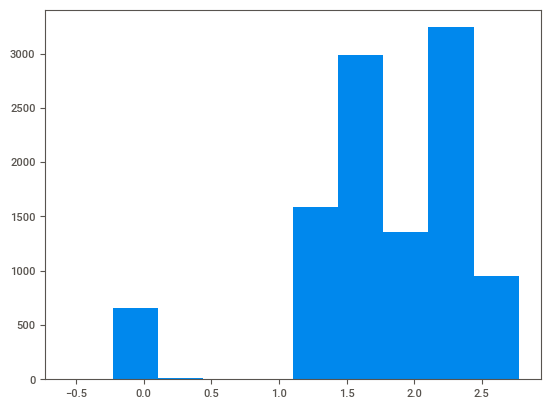

In [34]:
plt.hist(data['Ipv'])
plt.show() 

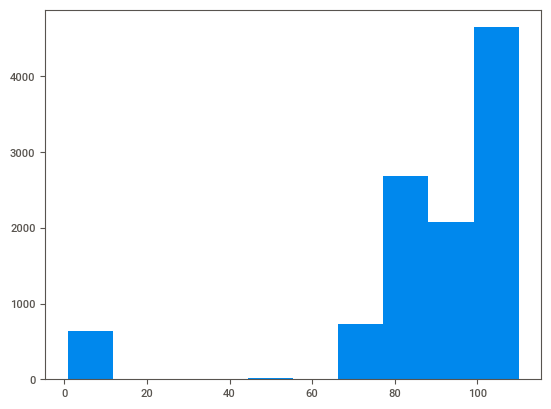

In [35]:
plt.hist(data['Vpv'])
plt.show() 

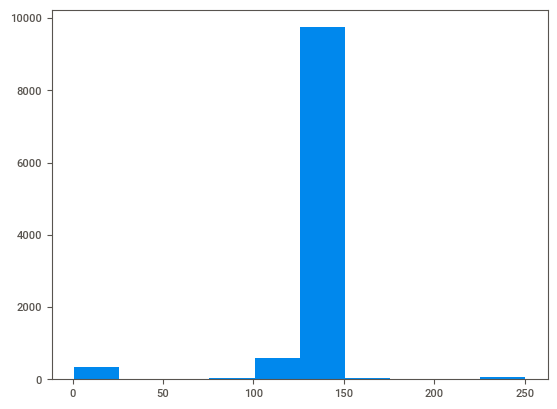

In [37]:
plt.hist(data['Vdc'])
plt.show()

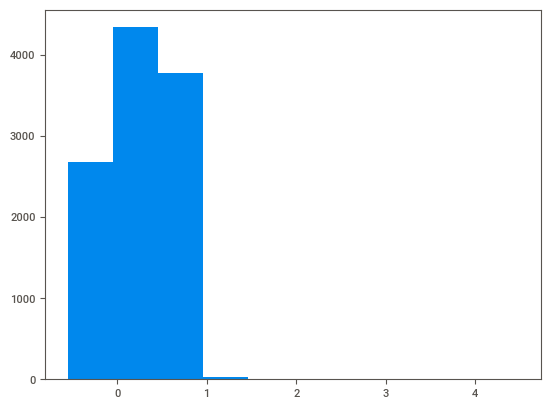

In [38]:
plt.hist(data['ia'])
plt.show()

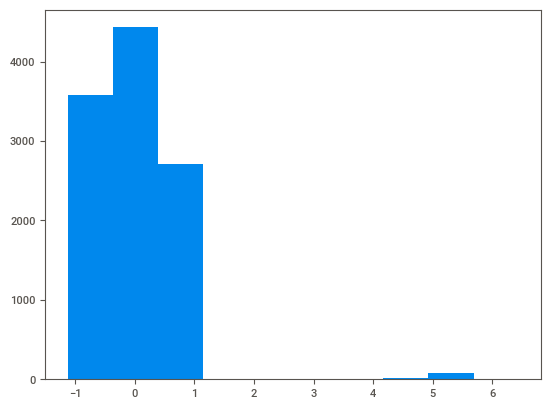

In [39]:
plt.hist(data['ib'])
plt.show()

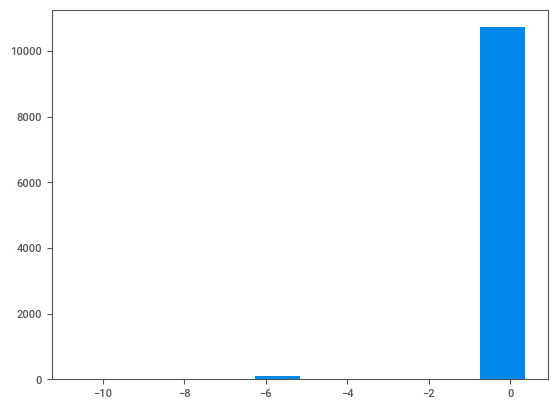

In [41]:
plt.hist(data['ic'])
plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ipv', ylabel='count'>

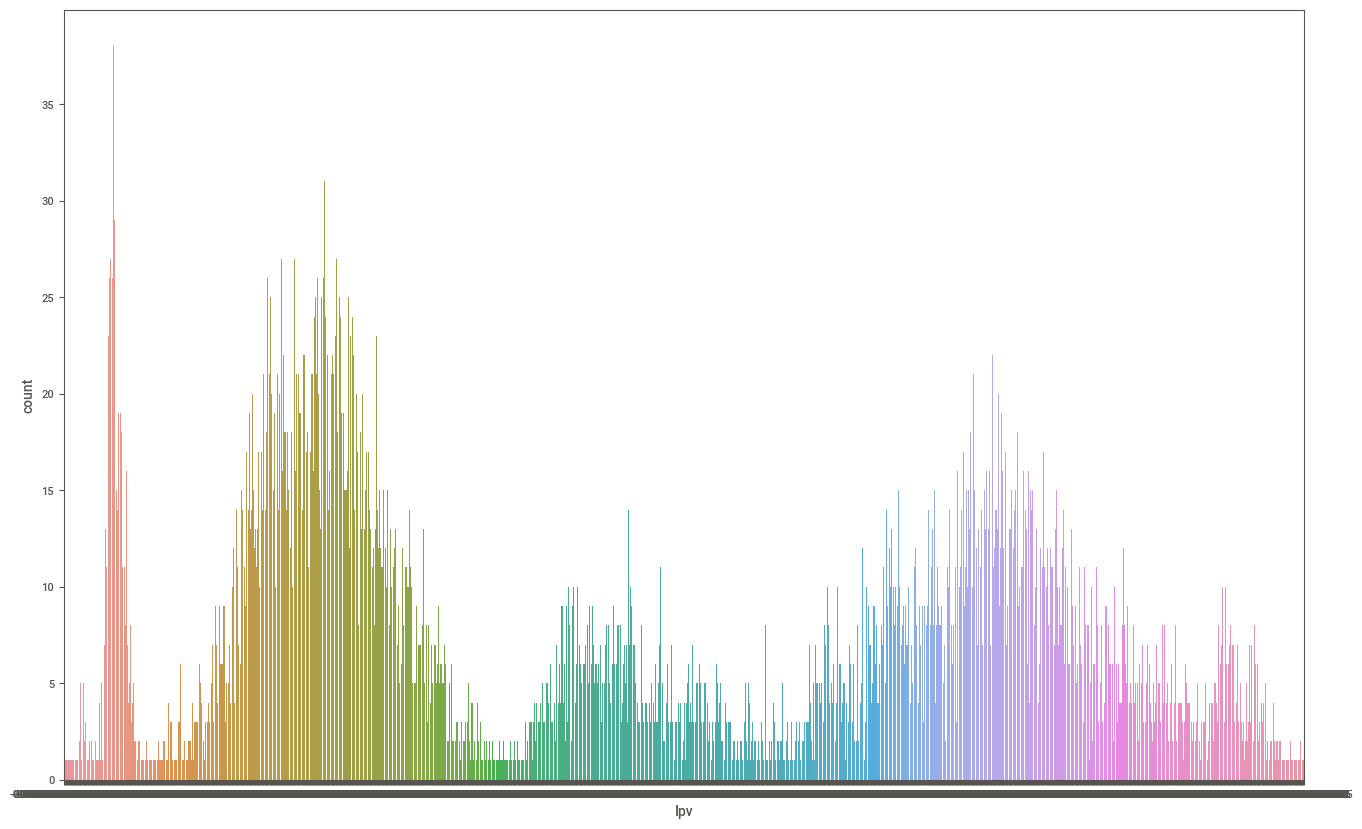

In [42]:
plt.figure(1,figsize=(16,10))
sns.countplot(data['Ipv'])

In [45]:
#heatmap
#show the magnitude of data in color by 2D


<AxesSubplot:>

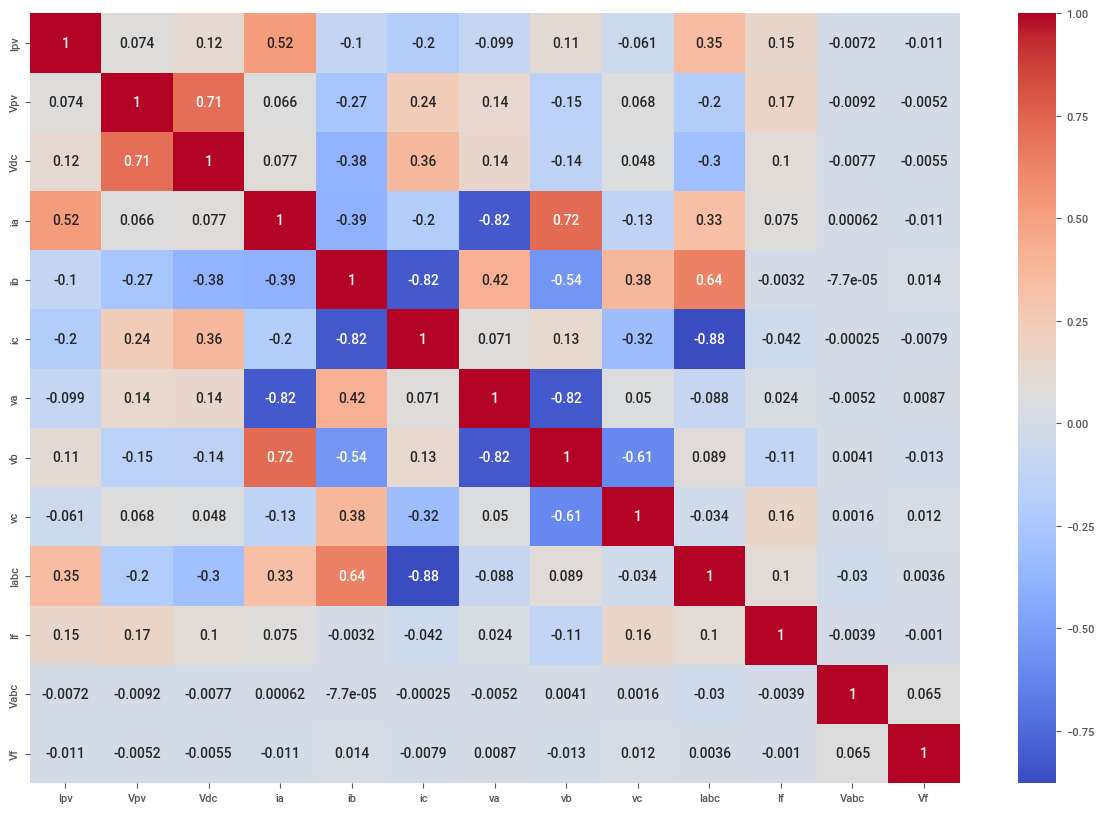

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True ,cmap='coolwarm')

In [48]:
#pairwise corr

<Figure size 1500x1000 with 0 Axes>

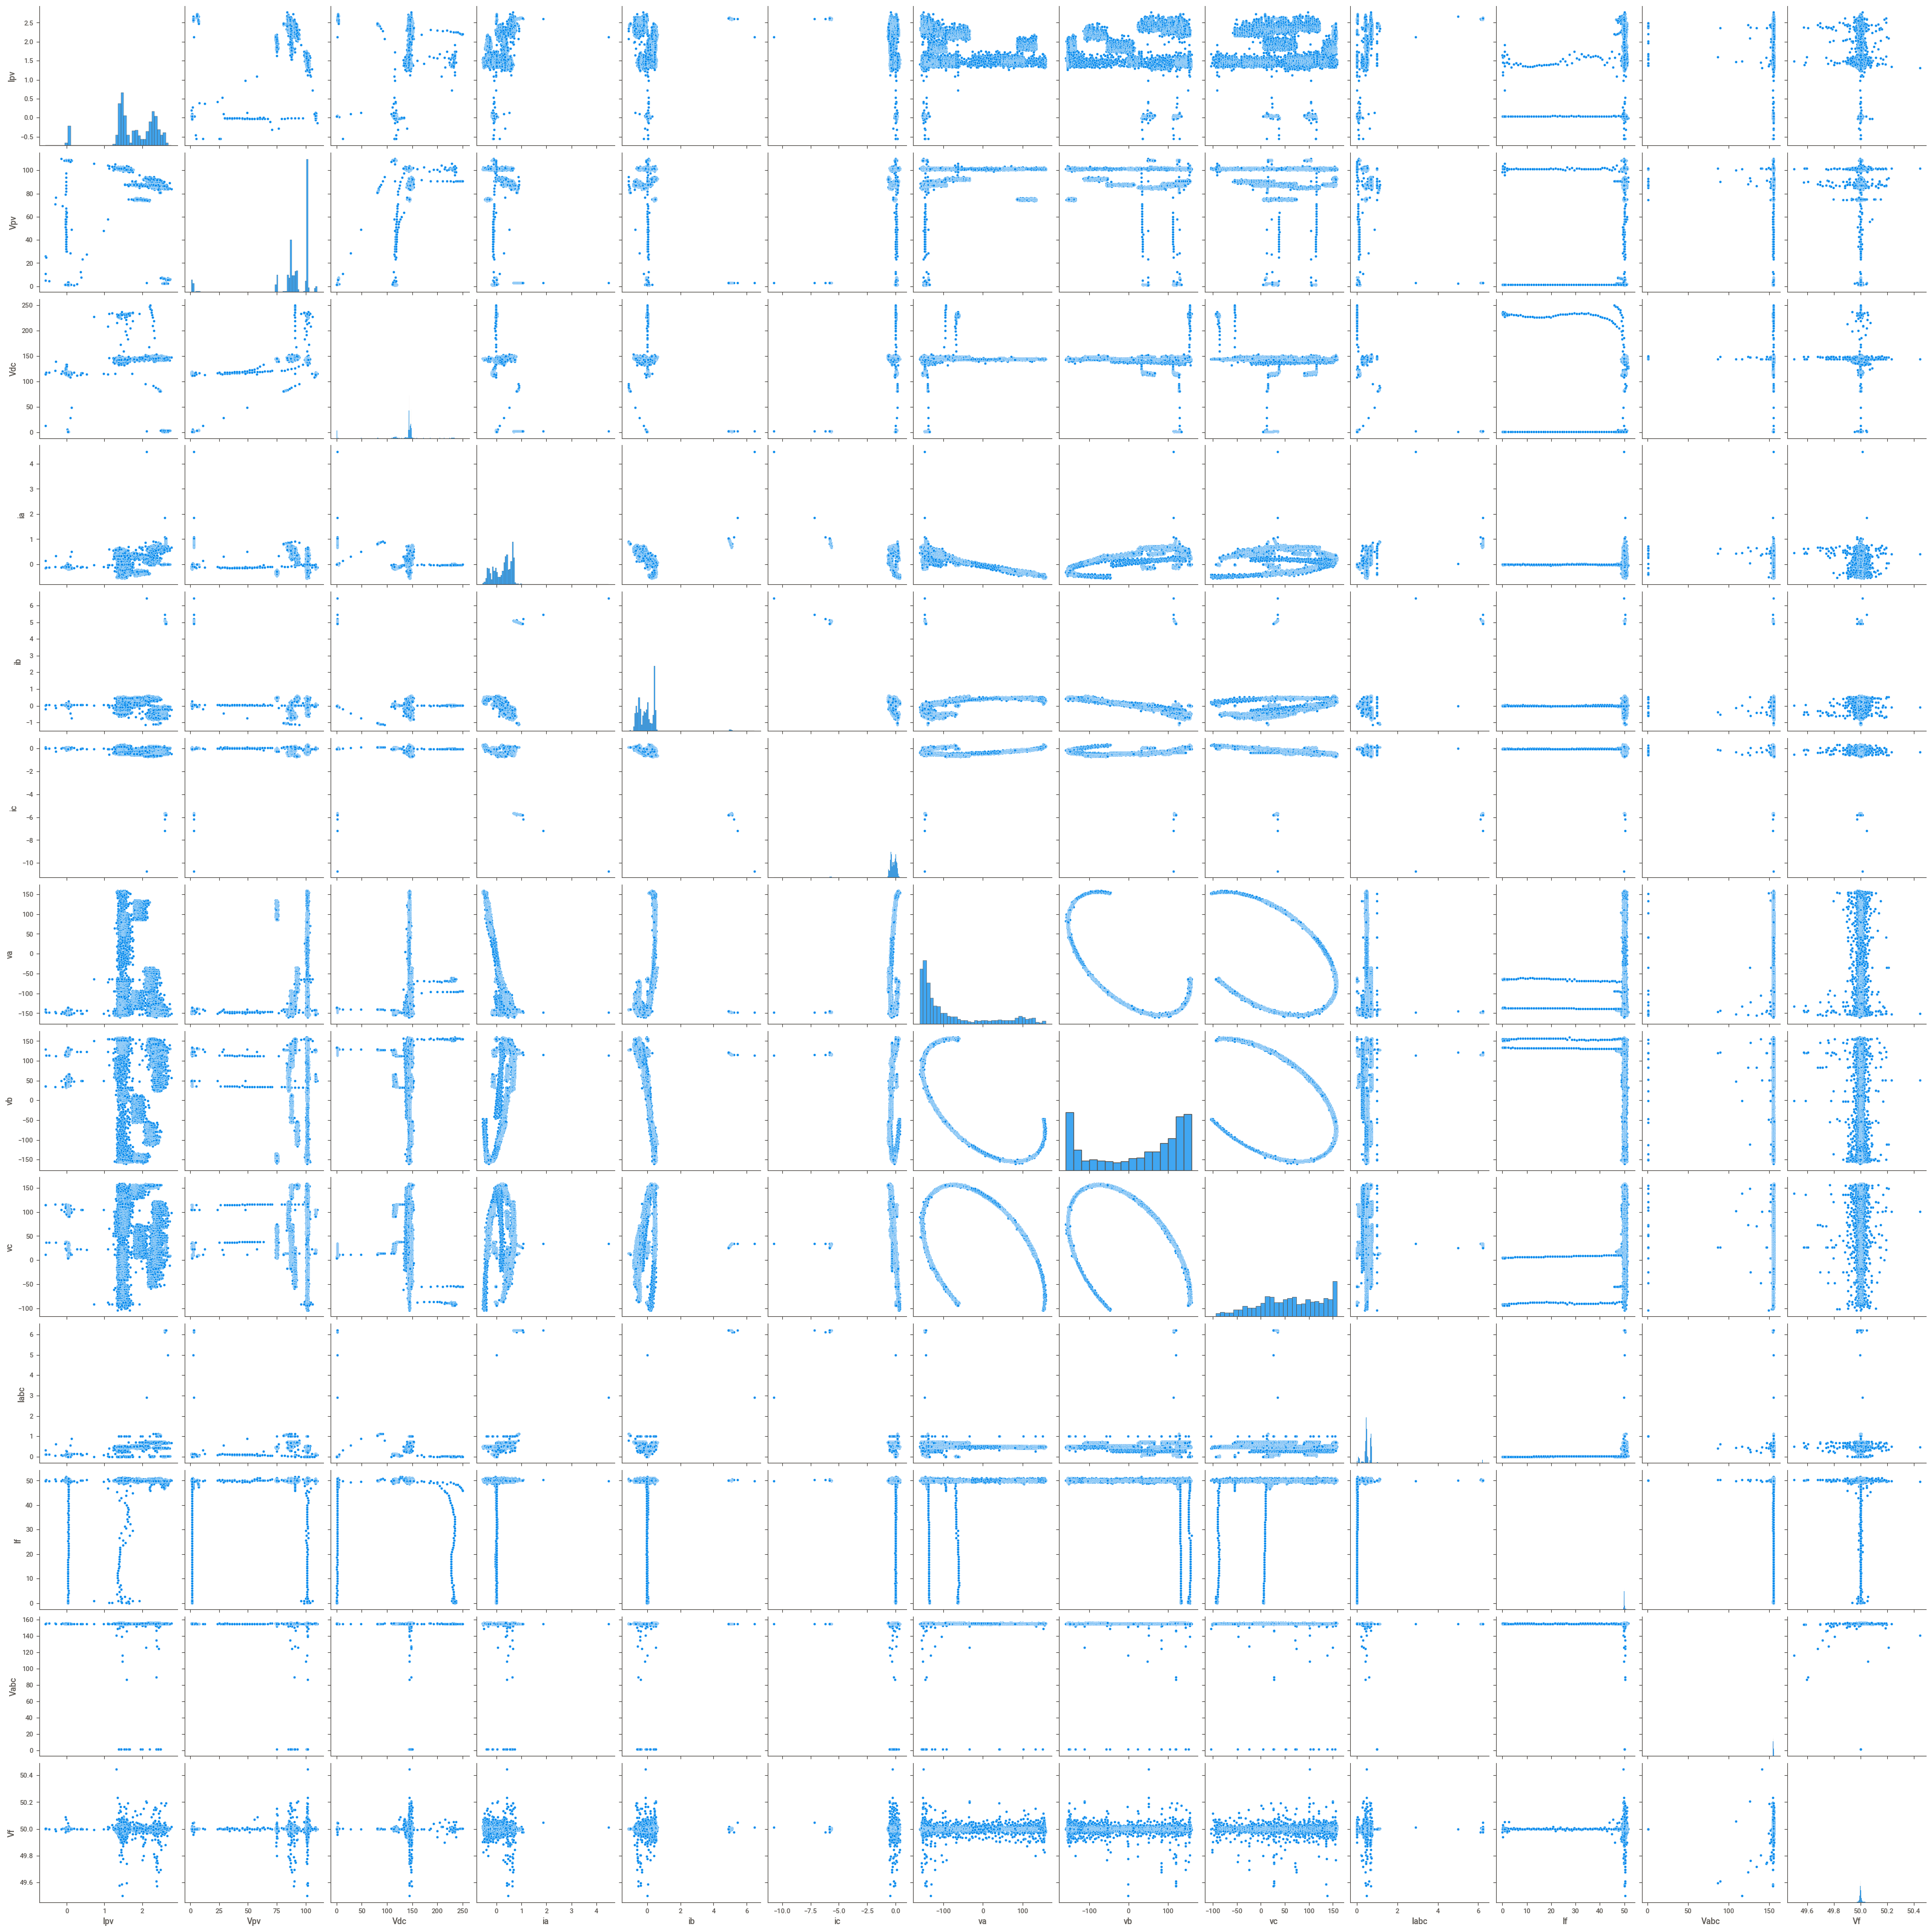

In [49]:
plt.figure(figsize=(15,10))
sns.pairplot(data.iloc[:,:])

In [51]:
#as we know there are outliner we need to winsorizer 


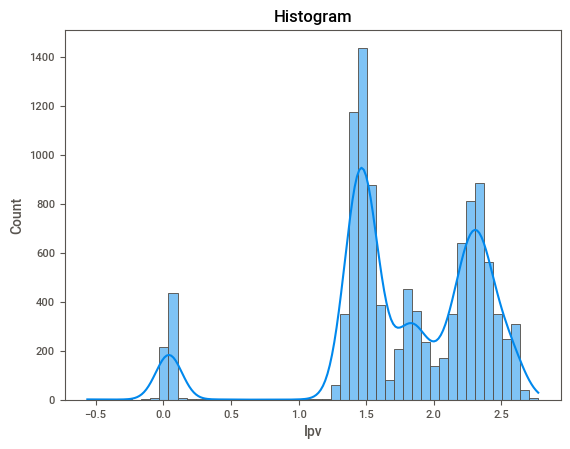

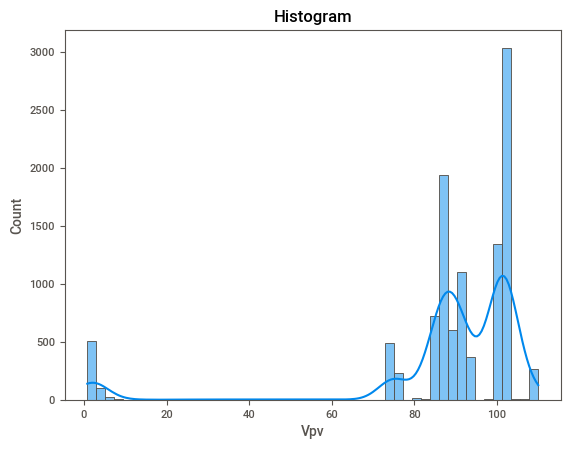

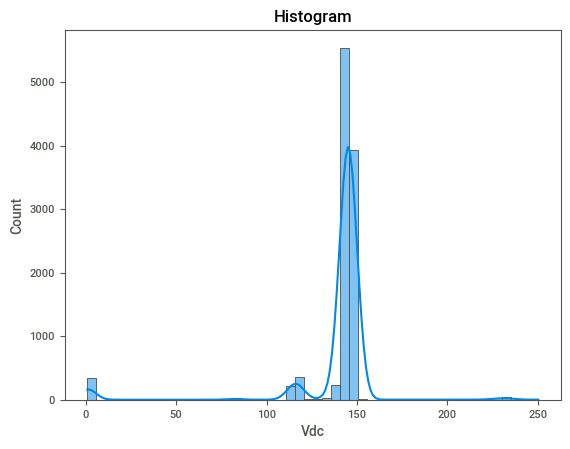

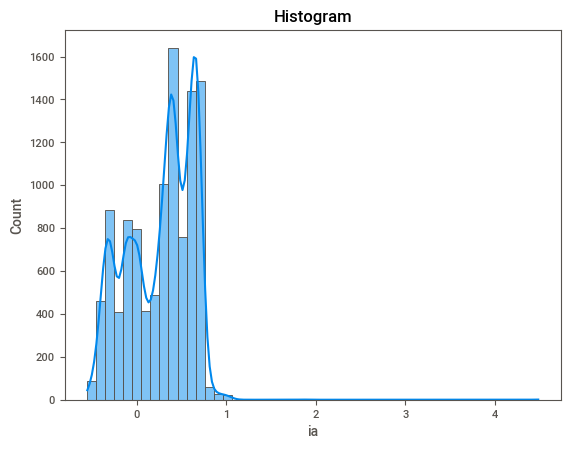

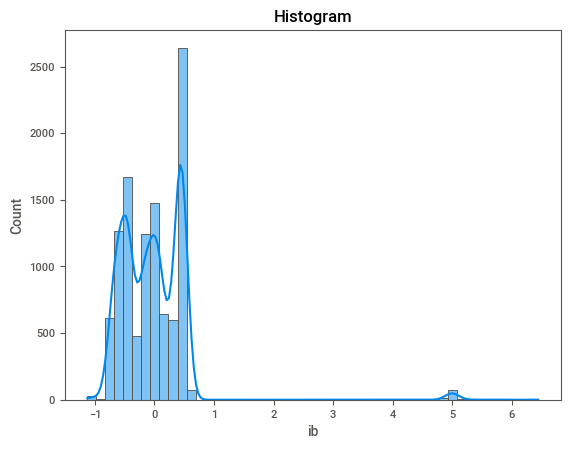

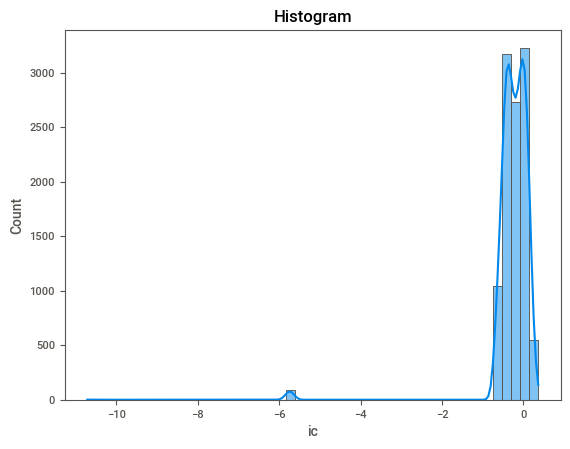

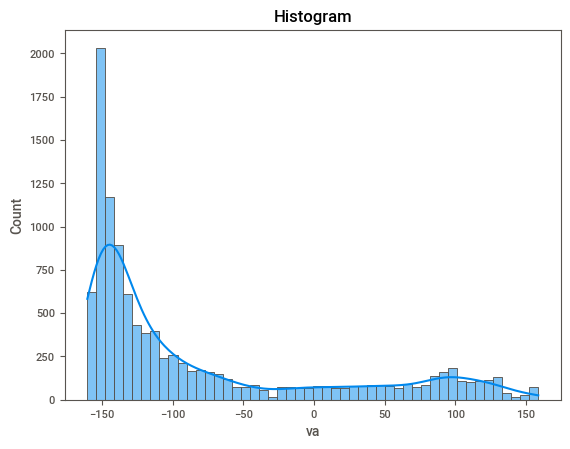

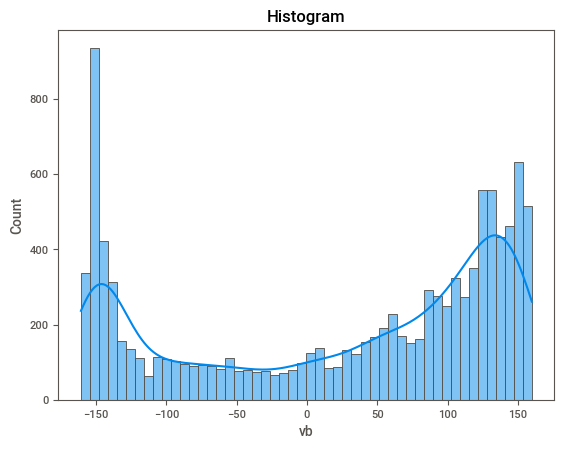

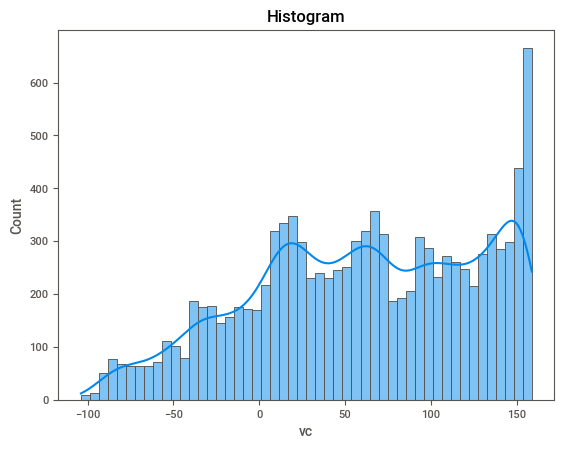

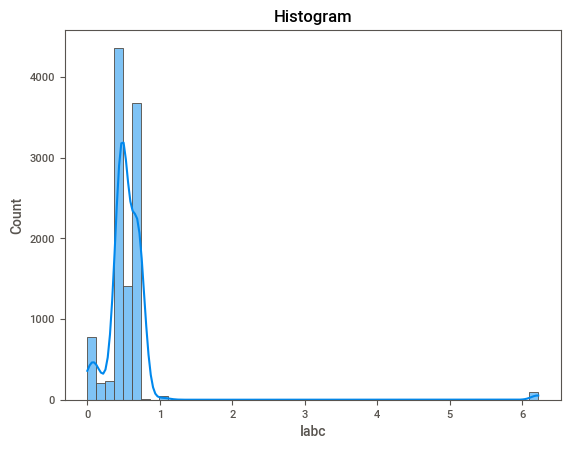

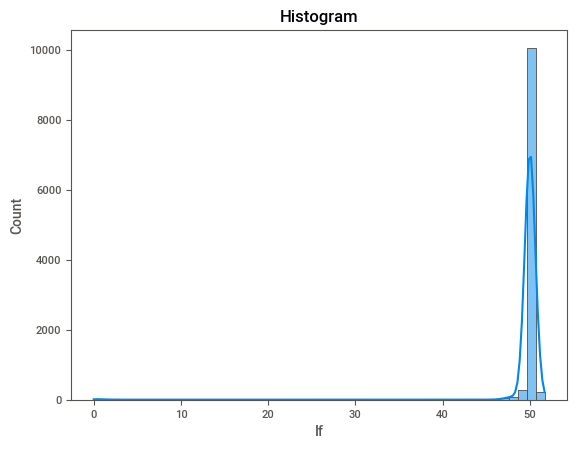

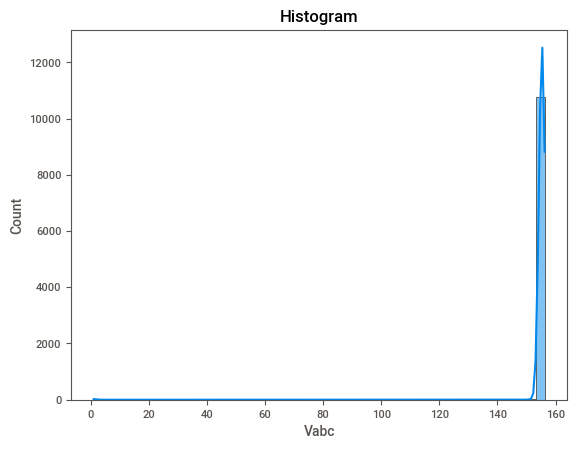

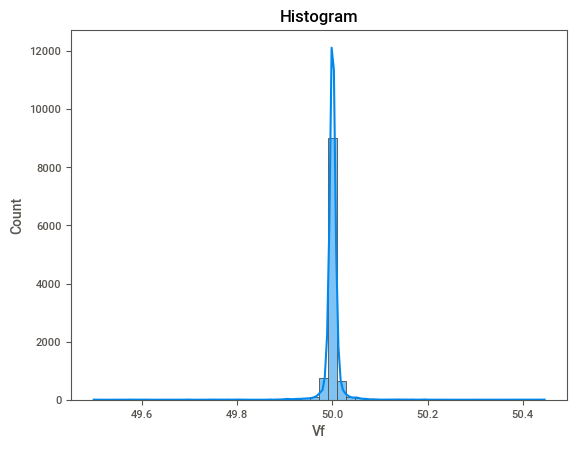

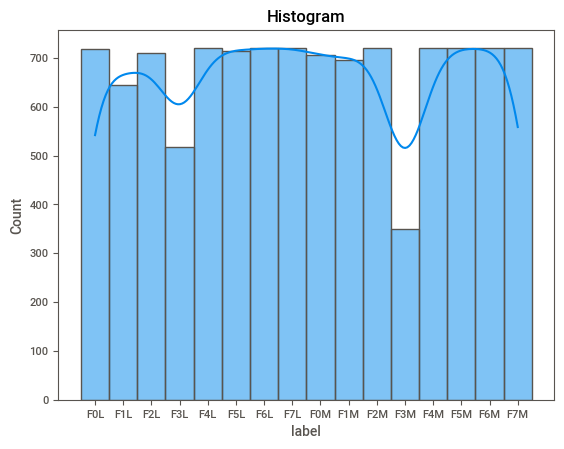

In [53]:
# Histogram for all columns

for i in data:
    sns.histplot(data[(i)], bins = 50, kde=True)
    plt.title("Histogram")
    plt.show()

# Seperating Input and Output Columns

In [63]:
X = data.iloc[:, :13]    # Predictors
y = data[['label']]      # Target

In [64]:
X.head()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf
0,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000
1,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000
2,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078
3,1.481506,101.135254,143.554688,-0.161988,0.436401,-0.328130,42.045898,-150.005493,109.052531,0.433003,48.973697,154.594808,49.907164
4,1.497589,101.098633,143.554688,-0.155274,0.429688,-0.341558,41.792755,-149.716187,109.016368,0.445855,49.328317,154.592104,50.092065


Normalizing the data using ( MinMaxScaler )

In [56]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [66]:
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, X.columns)])

In [67]:
scale = scale_columntransfer.fit(X)

In [68]:
scale

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If',
       'Vabc', 'Vf'],
      dtype='object'))])

In [71]:
joblib.dump(scale, 'minmax') # Dumping MinMaxScaler pipeline

['minmax']

In [70]:
import pickle, joblib

In [72]:
X_norm = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

In [74]:
X_norm

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf
0,0.640079,0.920597,0.574618,0.082667,0.213652,0.935112,0.633433,0.033772,0.810772,0.160778,0.967183,0.000000,0.529587
1,0.659665,0.917691,0.572268,0.078667,0.210993,0.939357,0.632715,0.033584,0.810924,0.160778,0.967183,0.000000,0.529587
2,0.652285,0.917859,0.573443,0.078667,0.209220,0.938751,0.632262,0.032869,0.811460,0.050037,0.959338,0.985686,0.733335
3,0.612830,0.918641,0.572268,0.077333,0.206560,0.937538,0.634377,0.033358,0.810726,0.069617,0.947335,0.989343,0.431620
4,0.617655,0.918306,0.572268,0.078667,0.205674,0.936325,0.633584,0.034261,0.810588,0.071683,0.954193,0.989325,0.626739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10814,0.853818,0.790009,0.580494,0.216000,0.050532,0.980594,0.109442,0.947123,0.327444,0.113029,0.968508,0.994902,0.546485
10815,0.856656,0.793138,0.580494,0.214667,0.050532,0.981807,0.109177,0.946408,0.325288,0.112573,0.966444,0.994580,0.524817
10816,0.877377,0.791797,0.578143,0.217333,0.054078,0.981807,0.110499,0.947537,0.326037,0.112580,0.964044,0.994657,0.527137
10817,0.870849,0.790177,0.579318,0.216000,0.054965,0.982414,0.112009,0.947161,0.326787,0.111278,0.971429,0.994337,0.530096


In [76]:
X=X_norm
